Code link: https://colab.research.google.com/drive/1iUqsbWtDc9EyWVIeSXast5QFBFt3g1f7#scrollTo=Pjj_9ygGTIqZ

DataSet Link: https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset/data

# STUDENT NAME: UZUM STANLEY EKENE
# STUDENT ID: UZU22571175


# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:180%;text-align:center;border-radius:20px 60px;"> [TRAFFIC PREDICTION FOR ROAD NETWORKS USING DEEP LEARNING]()</p>
In this comprehensive project, I aim to delve into the intricacies of traffic flow by examining a dataset encompassing four critical junctions. My objective is to construct a robust predictive model that can accurately forecast traffic volumes. By harnessing advanced analytical techniques, i anticipate uncovering underlying traffic patterns and trends. This insight is pivotal, as it could significantly contribute to alleviating traffic congestion issues. A thorough understanding of these dynamics will be instrumental in guiding the development of optimized infrastructure. Such enhancements are expected to streamline traffic management, thereby reducing bottlenecks and improving overall transportation efficiency. Ultimately, this endeavor seeks to pave the way for smoother commutes and a more sustainable urban mobility framework.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">

# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Table Of Contents</p>
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA EXPLORATION](#3)
    
    * [3.1 FEATURE ENGINEERING](#3.1)
    * [3.2 EXPLORATORY DATA ANALYSIS](#3.2)

    
* [4. DATA TRANSFORMATION AND PREPROCESSING](#4)
    
* [5. MODEL BUILDING](#5)
    
* [6. FITTING THE MODEL](#6)
    
* [7. INVERSING THE TRANSFORMATION OF DATA](#7)
    
* [8. END](#8)

 <a id="1"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Loading Data</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Data
dataset = pd.read_csv("/content/drive/MyDrive/DEEP LEARNING/traffic.csv")
dataset.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

In [ ]:
data = dataset.copy()
data.shape

(48120, 4)

**About the data**

This dataset represents a meticulously compiled log of vehicular counts, recorded at hourly intervals across four pivotal junctions. It serves as a valuable resource for analyzing traffic flow patterns, providing insights into peak hours, and facilitating data-driven strategies to enhance road network efficiency and reduce congestion.
The CSV file provides four features:

* DateTime
* Junctions
* Vehicles
* ID

The sensors on each of these junctions were collecting data at different times, hence the traffic data from different time periods. Some of the junctions have provided limited or sparse data.

<a id="3"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Data Exploration</p>
* Check for missing values
* Pharsing dates
* Ploting timeseris.  
* Feature engineering for EDA

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
# Print the missing values count for each column
print("Missing values count for each column:")
print(missing_values)
# Check if there are any missing values in the entire dataset
if missing_values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values found in the dataset.")

Missing values count for each column:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

No missing values found in the dataset.


In [ ]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info

<bound method DataFrame.info of                  DateTime  Junction  Vehicles
0     2015-11-01 00:00:00         1        15
1     2015-11-01 01:00:00         1        13
2     2015-11-01 02:00:00         1        10
3     2015-11-01 03:00:00         1         7
4     2015-11-01 04:00:00         1         9
...                   ...       ...       ...
48115 2017-06-30 19:00:00         4        11
48116 2017-06-30 20:00:00         4        30
48117 2017-06-30 21:00:00         4        16
48118 2017-06-30 22:00:00         4        22
48119 2017-06-30 23:00:00         4        12

[48120 rows x 3 columns]>

Text(0.5, 0, 'Date')

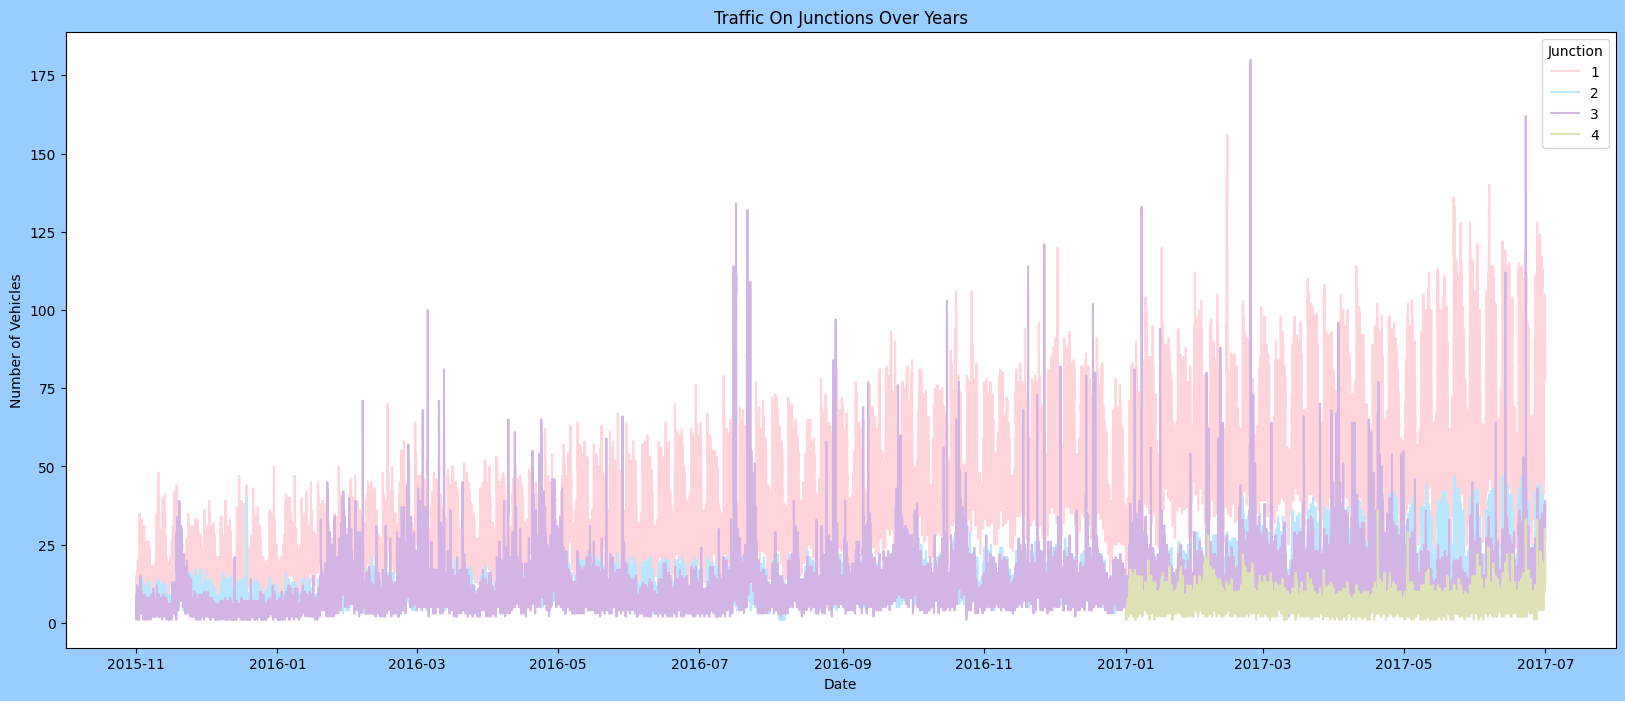

In [ ]:
#df to be used for EDA
df=data.copy()
#Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,8),facecolor="#99ccff")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

**Key observations from the plot include:**

* The initial junction displays a clear upward trend.
* Sparse data for the fourth junction begins only after 2017.
* There is no apparent seasonality depicted in the plot, indicating the need to delve into the datetime composition for further insights.













<a id="3.1"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Feature Engineering</p>

During this stage, I am generating several new features based on DateTime. These include:
* Year
* Month
* Date in the given month
* Days of week
* Hour

In [ ]:
#Exploring more features
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

DateTime  Junction  Vehicles  Year  Month  Date_no  Hour     Day
0 2015-11-01 00:00:00         1        15  2015     11        1     0  Sunday
1 2015-11-01 01:00:00         1        13  2015     11        1     1  Sunday
2 2015-11-01 02:00:00         1        10  2015     11        1     2  Sunday
3 2015-11-01 03:00:00         1         7  2015     11        1     3  Sunday
4 2015-11-01 04:00:00         1         9  2015     11        1     4  Sunday

<a id="3.2"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis</p>

Plotting the newly created features

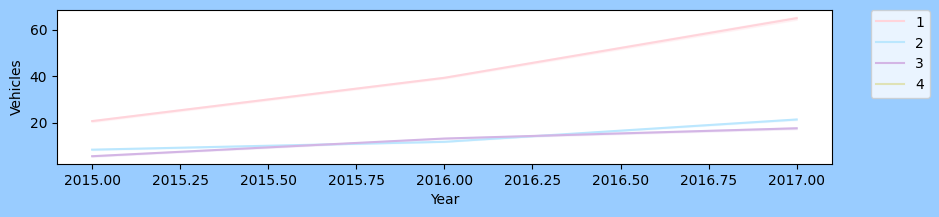

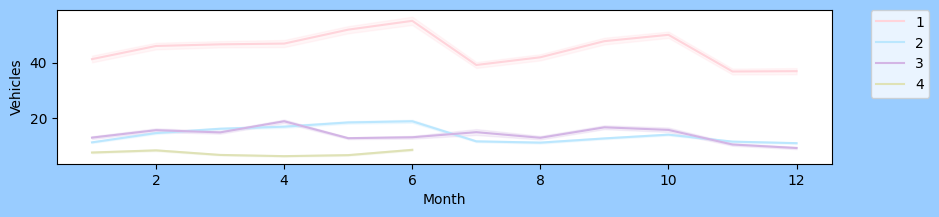

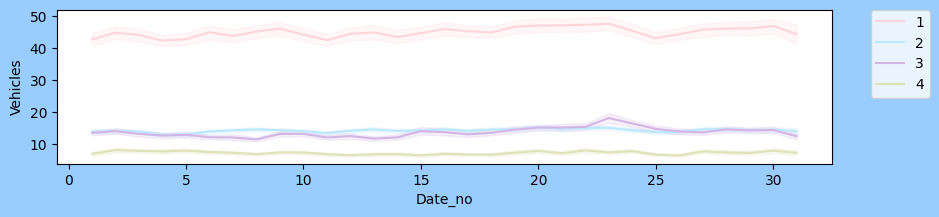

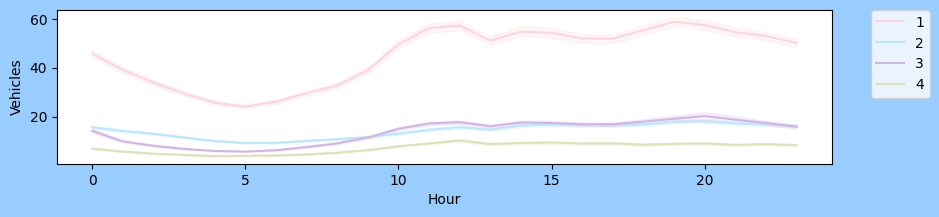

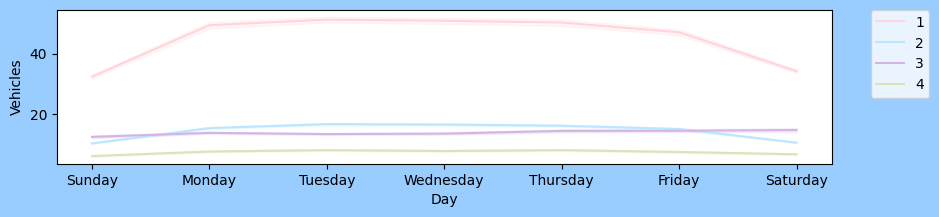

In [ ]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10, 2),facecolor="#99ccff")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Based on the above plot, the following conclusions can be drawn:**


* Yearly trends show an upward trajectory for all junctions, except the fourth junction, which lacks sufficient data spanning a year.  

* Notably, there is a surge in traffic at the first and second junctions around June, possibly attributed to summer break and related activities.

* Monthly data exhibits consistent patterns across all dates.

* Daily patterns reveal peaks during morning and evening hours, with a decline during nighttime, aligning with expectations.

* Weekly observations indicate smoother traffic on Sundays due to fewer vehicles on the roads, while traffic remains steady from Monday to Friday.

















Text(0.5, 0, 'Date')

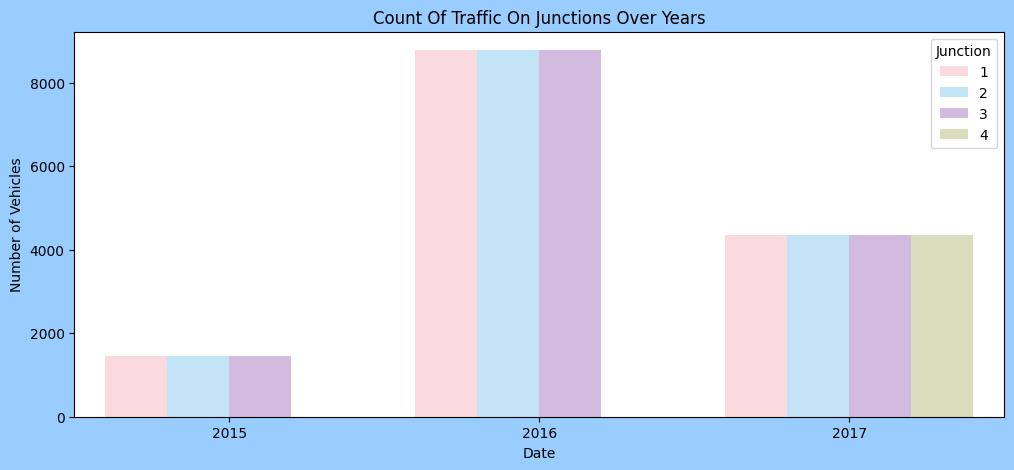

In [ ]:
plt.figure(figsize=(12,5),facecolor="#99ccff")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

The count plot indicates a rise in vehicle numbers from 2015 to 2016. However, drawing conclusions for 2017 is inconclusive due to limited data available, only extending to the seventh month of the year.

<Axes: >

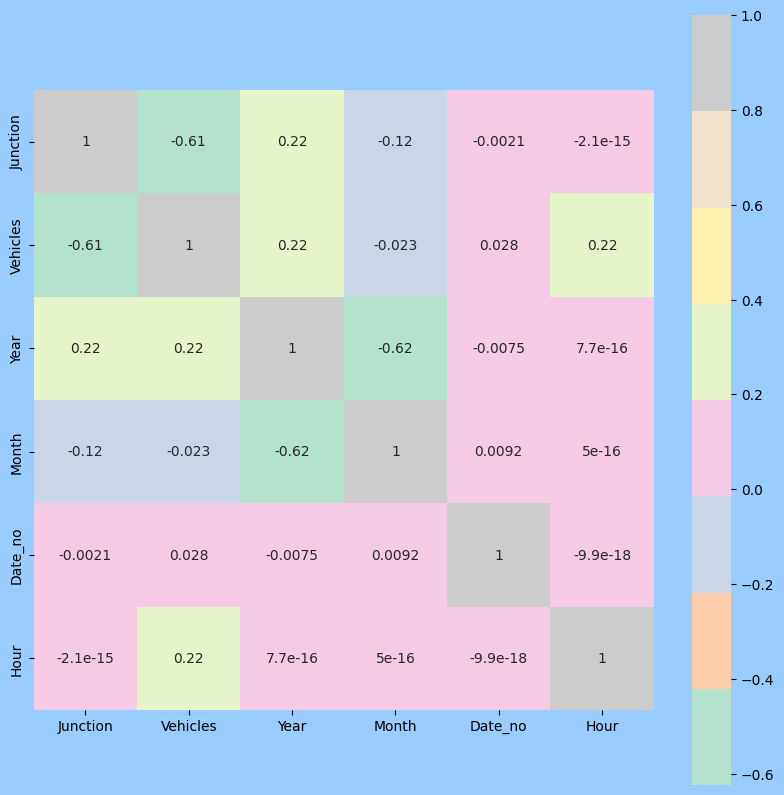

In [ ]:
# Select only numeric dtypes
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corrmat = numeric_df.corr()

# Plot heatmap
plt.subplots(figsize=(10,10),facecolor="#99ccff")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True)

The preexisting feature exhibits the highest correlation. To conclude my exploratory data analysis (EDA), I will utilize a pair plot, providing a comprehensive visual representation of the data.

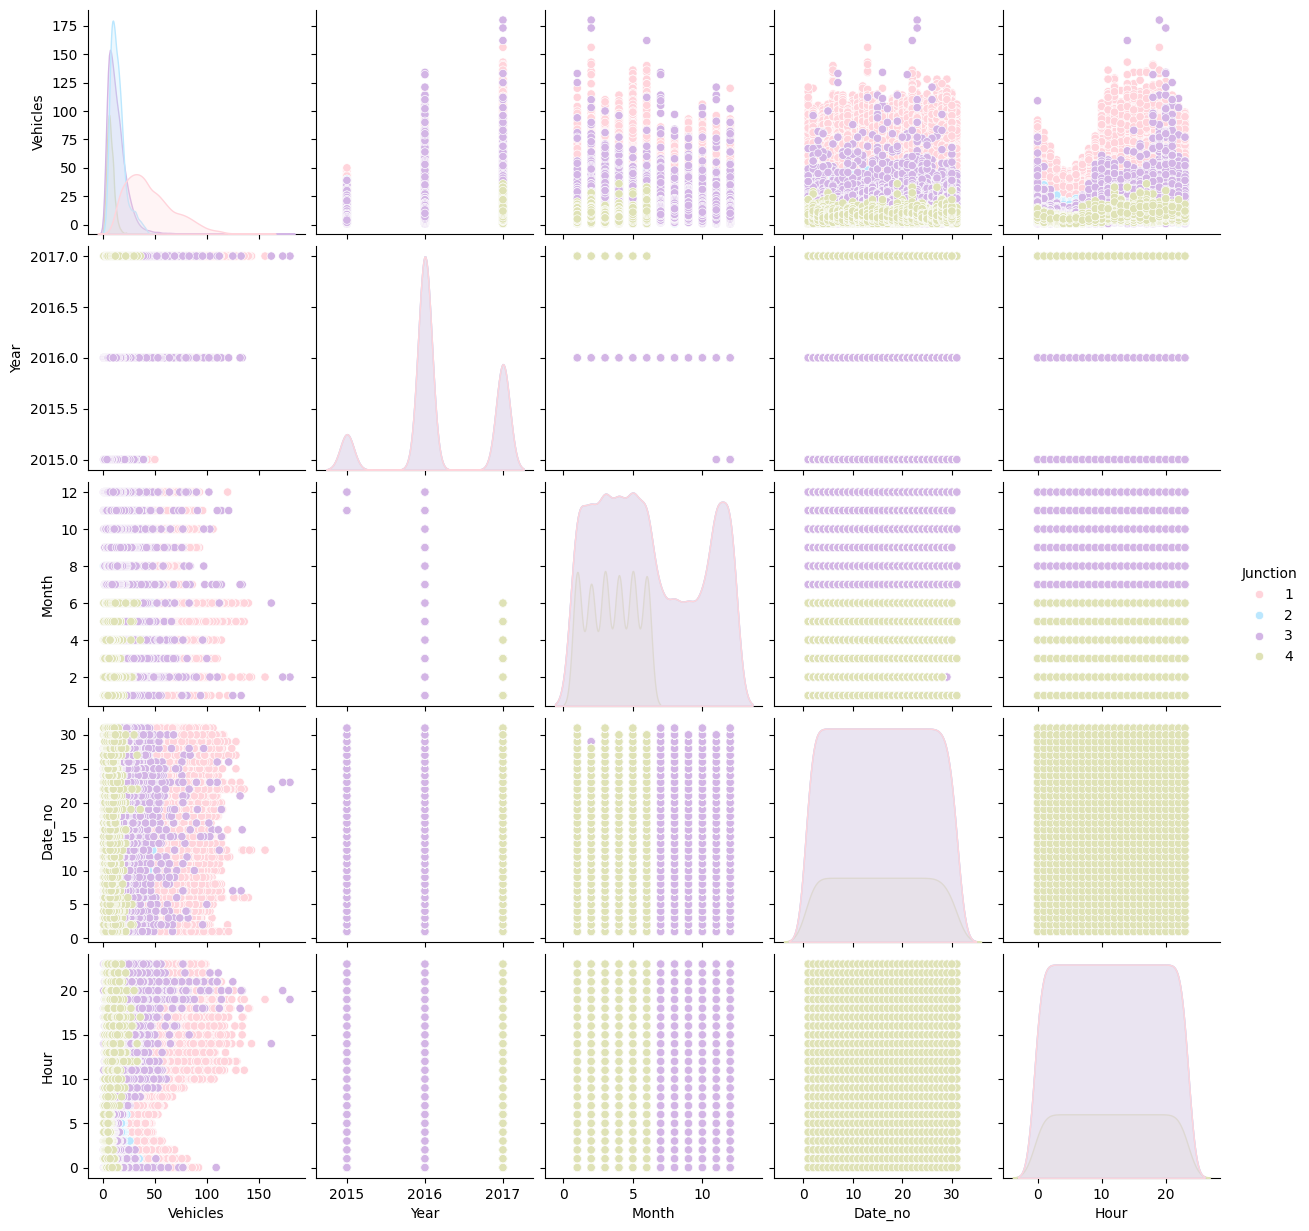

In [ ]:
sns.pairplot(data=df, hue= "Junction",palette=colors)

**Conclusions that I have come to draw after this EDA**

* The span of data from all four junctions is not the same. Data provided for the fourth junction is limited to only 2017.
* The yearly trend for Junctions one, two and three have diffrent slopes.
* Junction number one has a more strong weekly seasonality in comparison to the other junctions.

For the above-postulated reasons, I think that junctions must be transformed as per their individual needs.


<a id="4"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Data Transformation And Preprocessing</p>

**In this step I will be following the subsequent order:**

* Creating different frames for each Junction and plotting them
* Transforming the series and plotting them
* Performing the Augmented Dickey-Fuller test to check the seasonality of transformed series
* Creating test and train sets

In [ ]:
#Pivoting data fron junction
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

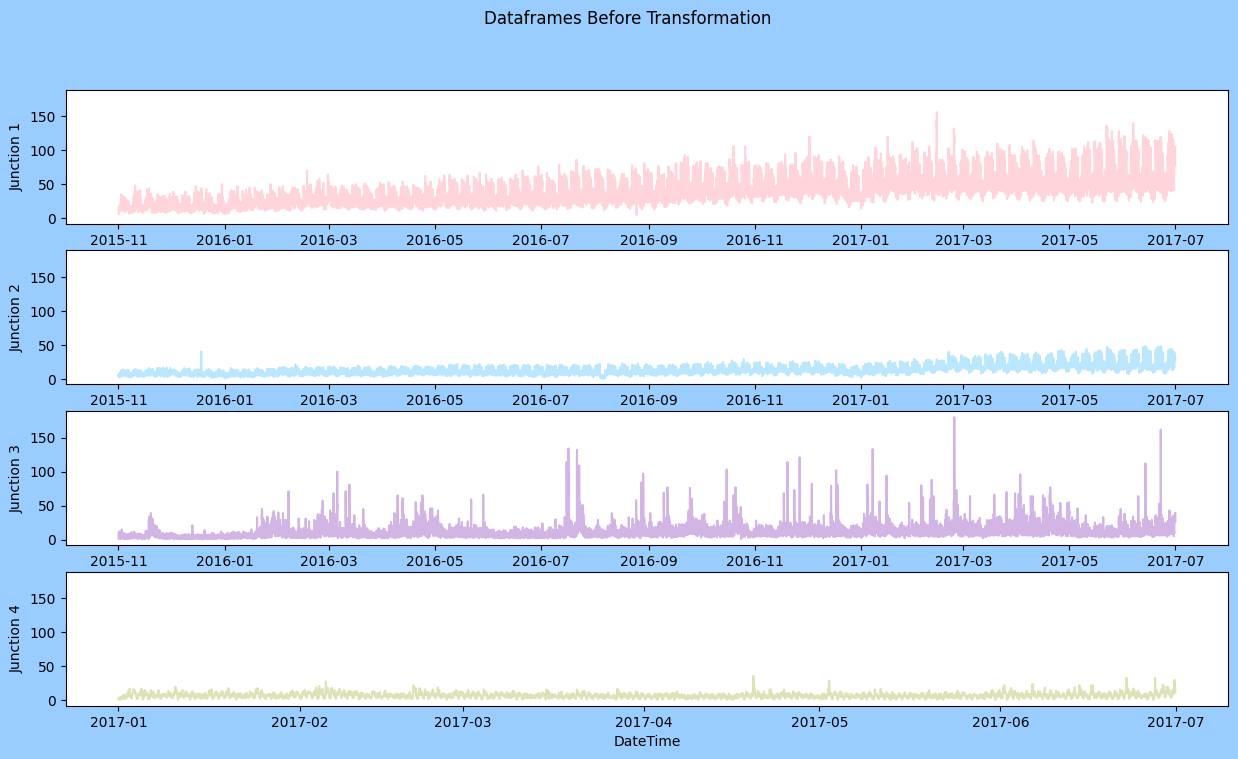

In [ ]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#99ccff", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")


#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")

A time series is considered stationary if it lacks both trend and seasonality. However, our exploratory data analysis (EDA) revealed the presence of weekly seasonality and an upward trend over the years. As demonstrated in the above plot, it's reaffirmed that Junctions one and two exhibit an upward trend. Limiting the data span would likely accentuate the weekly seasonality further. However, I'll defer this step for now and proceed with the respective transformations on the datasets.

**Steps for Transforming:**
* Normalizing
* Differencing

In [ ]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

Based on the aforementioned observations, differencing to remove seasonality should be executed as outlined below:
* For Junction one: Differencing of weekly values will be undertaken.
* For Junction two: Employing the difference of consecutive days is deemed more suitable.
* For Junctions three and four: Differencing of hourly values will suffice for eliminating seasonality.





















In [ ]:
#Normalizing and Differencing to make the series stationary
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

**Plots of Transformed Dataframe**

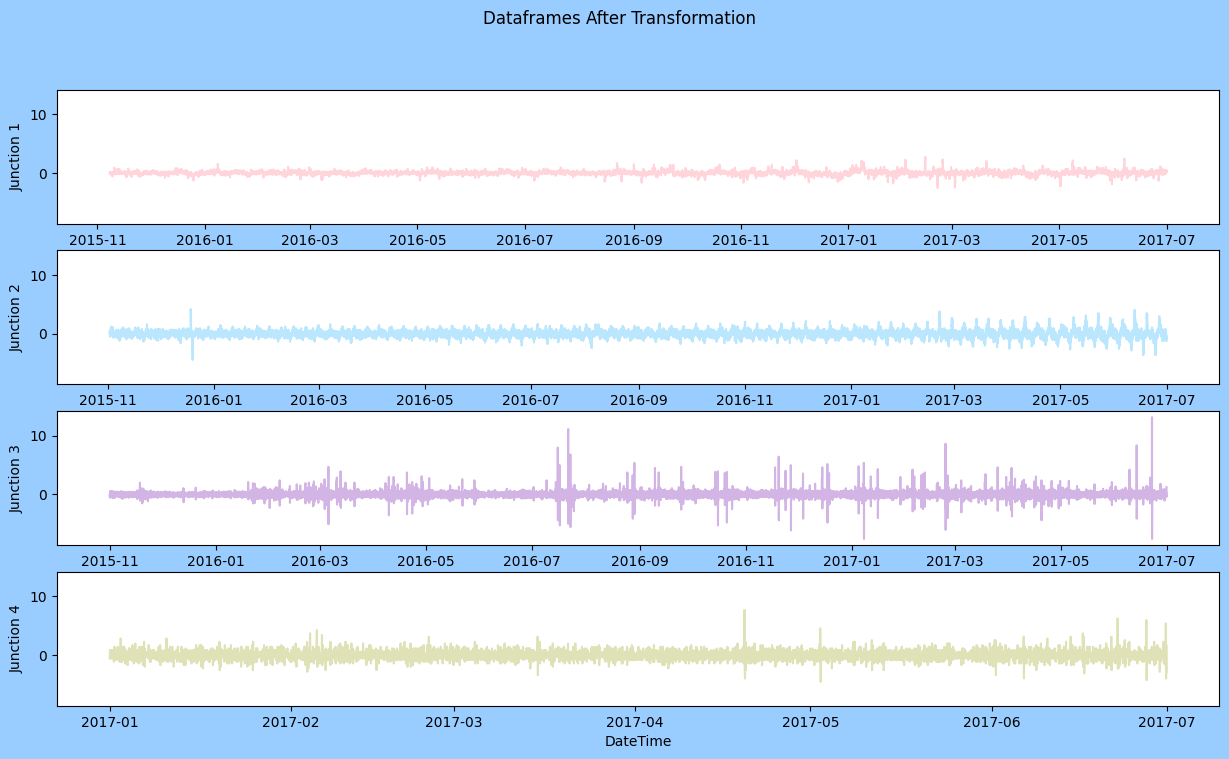

In [ ]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

The plots depicted above appear to exhibit linearity. To verify their stationarity, I will conduct an Augmented Dickey-Fuller test.

In [ ]:
#Stationary Check for the time series Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")


#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415504
p-value: 4.798539876395756e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.79589102694011
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832504
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.97909256305238
p-value: 2.7787875325952613e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


**With the data now stationary, preprocessing for the neural network involves:**

* Dividing the dataset into test and train sets.
* Designating X as the features and y as the target variable.
* Reshaping the data appropriately for the neural network.
















In [ ]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets
J1_train, J1_test = Split_data(df_J1)
J2_train, J2_test = Split_data(df_J2)
J3_train, J3_test = Split_data(df_J3)
J4_train, J4_test = Split_data(df_J4)

#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)

X_trainJ4, y_trainJ4 = TnF(J4_train)
X_testJ4, y_testJ4 = TnF(J4_test)
X_trainJ4, X_testJ4 = FeatureFixShape(X_trainJ4, X_testJ4)

<a id="5"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Model Building</p>

 In this section, I am developing a function that the neural network can utilize to fit the data frames for all four junctions.

In [ ]:
# Custom Layer
class CustomLayer(layers.Layer):
    def __init__(self, units=32):
        super(CustomLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer="zeros",
            trainable=True,
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

# Custom_Model for the prediction
def Custom_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    model = Sequential()
    model.add(layers.Flatten(input_shape=(X_Train.shape[1], X_Train.shape[2])))  # Flatten layer
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(CustomLayer(50))  # Custom layer
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9), loss='mean_squared_error')
    model.fit(X_Train, y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120, callbacks=[early_stopping])
    pred_Custom = model.predict(X_Test)
    return pred_Custom

#GRU Model for the prediction
def GRU_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    #callback delta 0.01 may interrupt the learning.

    #The GRU model
    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    #model.add(GRU(units=50, return_sequences=True,  input_shape=(X_Train.shape[1],1),activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_GRU= model.predict(X_Test)
    return pred_GRU

# LSTM Model for the prediction
def LSTM_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)

    #The LSTM model
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_LSTM = model.predict(X_Test)
    return pred_LSTM

# CNN Model for the prediction
def CNN_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)

    #The CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_Train.shape[1],1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_CNN = model.predict(X_Test)
    return pred_CNN

# MLP Model for the prediction
def MLP_model(X_Train, y_Train, X_Test, y_Test):
    X_Train = np.squeeze(X_Train)  # This line removes the unnecessary dimension
    X_Test = np.squeeze(X_Test)    # Do the same for the test data
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    model = Sequential()
    model.add(Dense(150, activation='relu', input_dim=X_Train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train, y_Train, validation_data=(X_testJ1, y_testJ1), epochs=50, batch_size=120, callbacks=[early_stopping])
    pred_MLP = model.predict(X_Test)
    return pred_MLP

#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5),facecolor="#99ccff")
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

<a id="6"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Fitting The Model</p>

Next, I will fit the transformed training sets of the four junctions to the created model and compare them with the transformed test sets.

**Fitting the first junction and plotting the predictions and testset**

In [ ]:
#Predictions For First Junction
print("\033[1;31;2m########------Custom Model------########\033[0m")
PredJ1_Custom = Custom_model(X_trainJ1,y_trainJ1,X_testJ1, y_testJ1)
print("-" * 70)

print("\033[1;31;2m########------GRU Model------########\033[0m")
PredJ1_GRU = GRU_model(X_trainJ1,y_trainJ1,X_testJ1, y_testJ1)
print("-" * 70)

print("\033[1;34;2m########------LSTM Model------########\033[0m")
PredJ1_LSTM = LSTM_model(X_trainJ1,y_trainJ1,X_testJ1, y_testJ1)
print("-" * 70)

print("\033[1;32;2m########------CNN Model------########\033[0m")
PredJ1_CNN = CNN_model(X_trainJ1,y_trainJ1,X_testJ1, y_testJ1)
print("-" * 70)

print("\033[1;33;2m########------MLP Model------########\033[0m")
PredJ1_MLP = MLP_model(X_trainJ1,y_trainJ1,X_testJ1, y_testJ1)
print("-" * 70)


########------Custom Model------########
Epoch 1/50
108/108 [==============================] - 3s 5ms/step - loss: 0.0747 - val_loss: 0.0736
Epoch 2/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0578 - val_loss: 0.0674
Epoch 3/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.0643
Epoch 4/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0522 - val_loss: 0.0614
Epoch 5/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0508 - val_loss: 0.0611
Epoch 6/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0512 - val_loss: 0.0605
Epoch 7/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.0600
Epoch 8/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0488 - val_loss: 0.0601
Epoch 9/50
108/108 [==============================] - 0s 3ms/step - loss: 0.0484 - val_loss: 0.0595
Epoch 10/50
108/108 [==============================] - 0s 4

########------Custom Model------########
The root mean squared error is 0.24033386260972242.


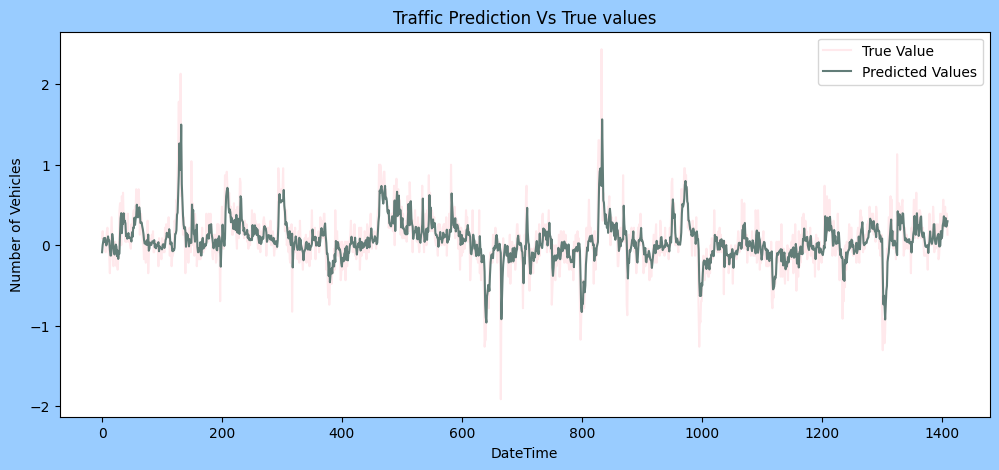

########------GRU Model------########
The root mean squared error is 0.24793562132053842.


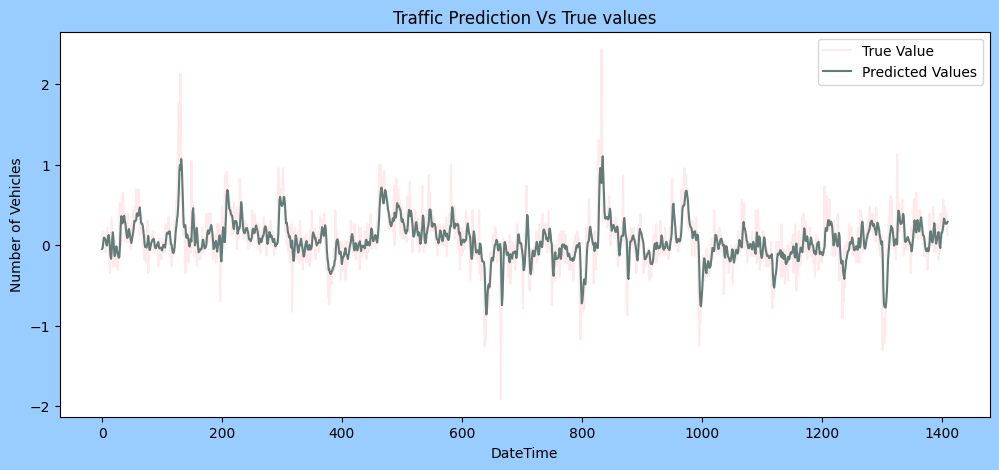


########------LSTM Model------########
The root mean squared error is 0.27238365102223266.


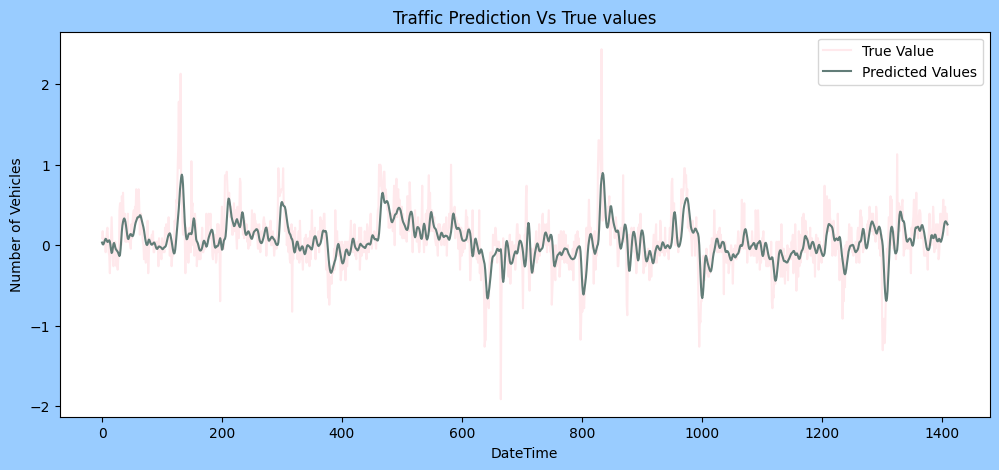


########------CNN Model------########
The root mean squared error is 0.24593204961517137.


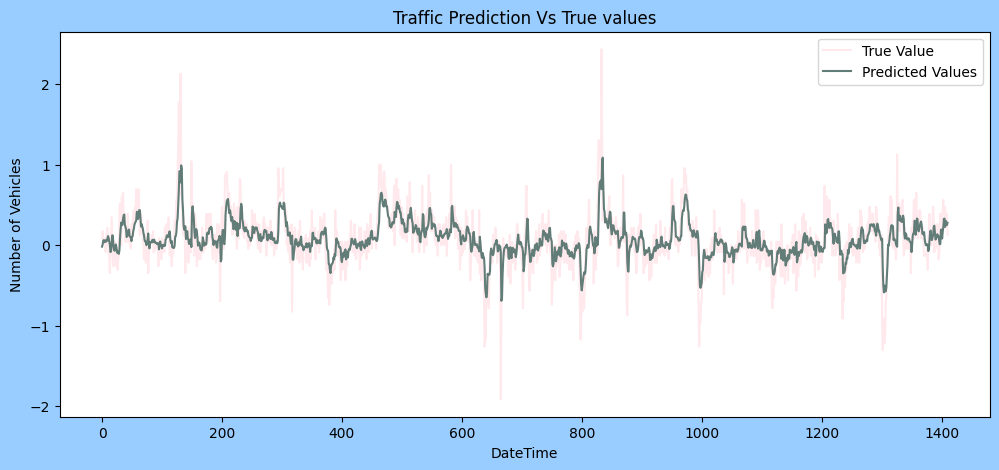


########------MLP Model------########
The root mean squared error is 0.24301931085575879.


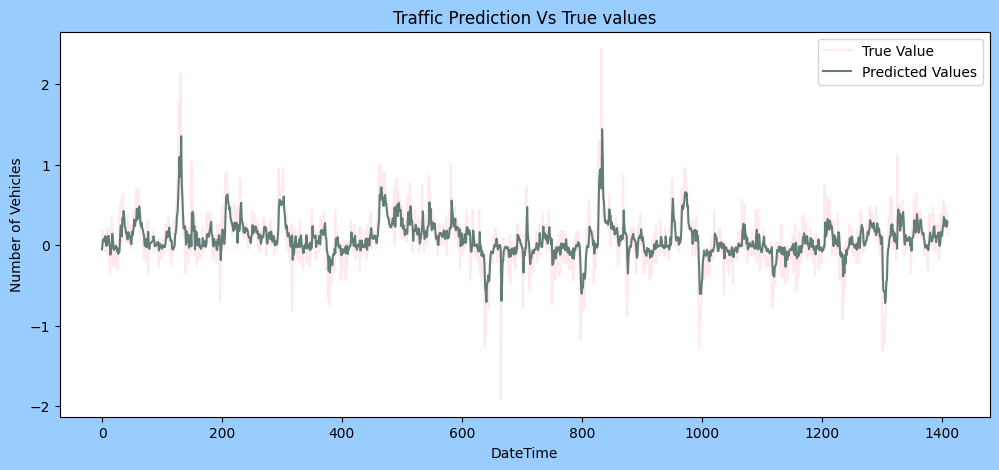


Best Model: Custom - RMSE: 0.24033386260972242



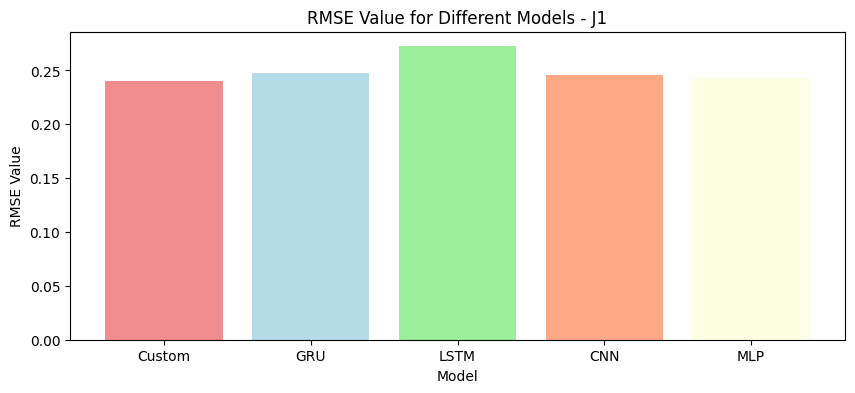

In [ ]:
# Results for J1 - Custom Model
print("\033[1;31;2m########------Custom Model------########\033[0m")
RMSE_J1_Custom = RMSE_Value(y_testJ1, PredJ1_Custom)
PredictionsPlot(y_testJ1, PredJ1_Custom, 0)

# Results for J1 - GRU Model
print("\033[1;31;2m########------GRU Model------########\033[0m")
RMSE_J1_GRU = RMSE_Value(y_testJ1, PredJ1_GRU)
PredictionsPlot(y_testJ1, PredJ1_GRU, 0)

# Results for J1 - LSTM Model
print("\n\033[1;34;2m########------LSTM Model------########\033[0m")
RMSE_J1_LSTM = RMSE_Value(y_testJ1, PredJ1_LSTM)
PredictionsPlot(y_testJ1, PredJ1_LSTM, 0)

# Results for J1 - CNN Model
print("\n\033[1;32;2m########------CNN Model------########\033[0m")
RMSE_J1_CNN = RMSE_Value(y_testJ1, PredJ1_CNN)
PredictionsPlot(y_testJ1, PredJ1_CNN, 0)

# Results for J1 - MLP Model
print("\n\033[1;33;2m########------MLP Model------########\033[0m")
RMSE_J1_MLP = RMSE_Value(y_testJ1, PredJ1_MLP)
PredictionsPlot(y_testJ1, PredJ1_MLP, 0)

# Create a list of model names and their corresponding RMSE values
model_names = ["Custom", "GRU", "LSTM", "CNN", "MLP"]
rmse_values = [RMSE_J1_Custom, RMSE_J1_GRU, RMSE_J1_LSTM, RMSE_J1_CNN, RMSE_J1_MLP]

model_rmse = list(zip(model_names, rmse_values))
Results_df = pd.DataFrame(model_rmse, columns=["MODEL", "RMSE"])
styled_df = Results_df.style.background_gradient(cmap="cool")

# Find the best model with the minimum RMSE value
best_model_index = rmse_values.index(min(rmse_values))
best_model_name_1 = model_names[best_model_index]
best_model_rmse_1 = rmse_values[best_model_index]

# Print the best model name and its RMSE value
print("\n\033[1;31;4mBest Model: {} - RMSE: {}\n".format(best_model_name_1, best_model_rmse_1))

# Plot the bar graph for model names and RMSE values with transparency and lighter colors
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightyellow']
alpha = 0.9
fig, ax = plt.subplots(figsize=(10, 4))  # Set the figure size (width, height)
ax.bar(model_names, rmse_values, color=colors, alpha=alpha)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE Value for Different Models - J1')
plt.show()

display(styled_df)

In [ ]:
# Predictions For Second Junction
print("\033[1;31;2m########------Custom Model------########\033[0m")
PredJ2_Custom = Custom_model(X_trainJ2, y_trainJ2, X_testJ2, y_testJ2)
print("-" * 70)
print("\033[1;31;2m########------GRU Model------########\033[0m")
PredJ2_GRU = GRU_model(X_trainJ2, y_trainJ2, X_testJ2, y_testJ2)
print("-" * 70)
print("\033[1;34;2m########------LSTM Model------########\033[0m")
PredJ2_LSTM = LSTM_model(X_trainJ2, y_trainJ2, X_testJ2, y_testJ2)
print("-" * 70)
print("\033[1;32;2m########------CNN Model------########\033[0m")
PredJ2_CNN = CNN_model(X_trainJ2, y_trainJ2, X_testJ2, y_testJ2)
print("-" * 70)
print("\033[1;33;2m########------MLP Model------########\033[0m")
PredJ2_MLP = MLP_model(X_trainJ2, y_trainJ2, X_testJ2, y_testJ2)
print("-" * 70)

########------Custom Model------########
Epoch 1/50
109/109 [==============================] - 1s 5ms/step - loss: 0.2104 - val_loss: 0.2862
Epoch 2/50
109/109 [==============================] - 0s 4ms/step - loss: 0.1675 - val_loss: 0.2822
Epoch 3/50
109/109 [==============================] - 0s 4ms/step - loss: 0.1592 - val_loss: 0.2705
Epoch 4/50
109/109 [==============================] - 0s 4ms/step - loss: 0.1553 - val_loss: 0.2577
Epoch 5/50
109/109 [==============================] - 0s 4ms/step - loss: 0.1517 - val_loss: 0.2489
Epoch 6/50
109/109 [==============================] - 0s 4ms/step - loss: 0.1469 - val_loss: 0.2439
Epoch 7/50
109/109 [==============================] - 1s 6ms/step - loss: 0.1456 - val_loss: 0.2313
Epoch 8/50
109/109 [==============================] - 1s 5ms/step - loss: 0.1448 - val_loss: 0.2429
Epoch 9/50
109/109 [==============================] - 1s 6ms/step - loss: 0.1447 - val_loss: 0.2281
Epoch 10/50
109/109 [==============================] - 1s 6

########------Custom Model------########
The root mean squared error is 0.4776456888635244.


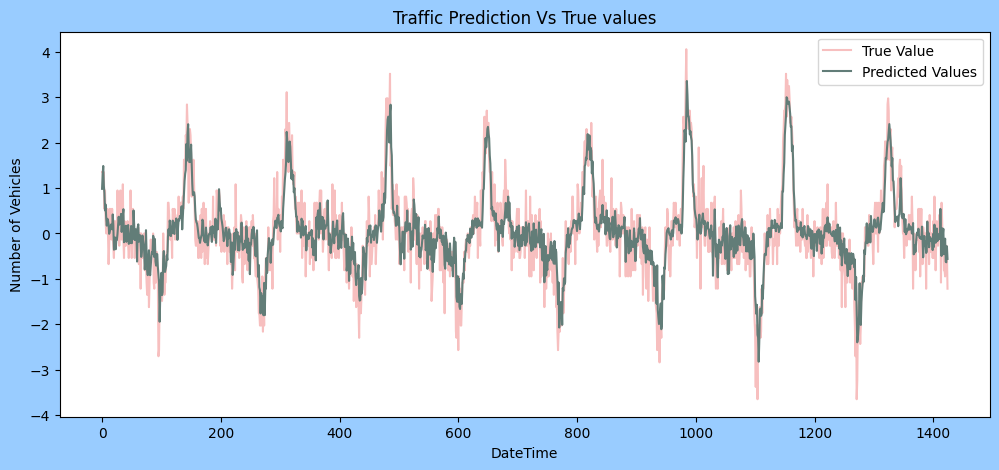

########------GRU Model------########
The root mean squared error is 0.5517160590069825.


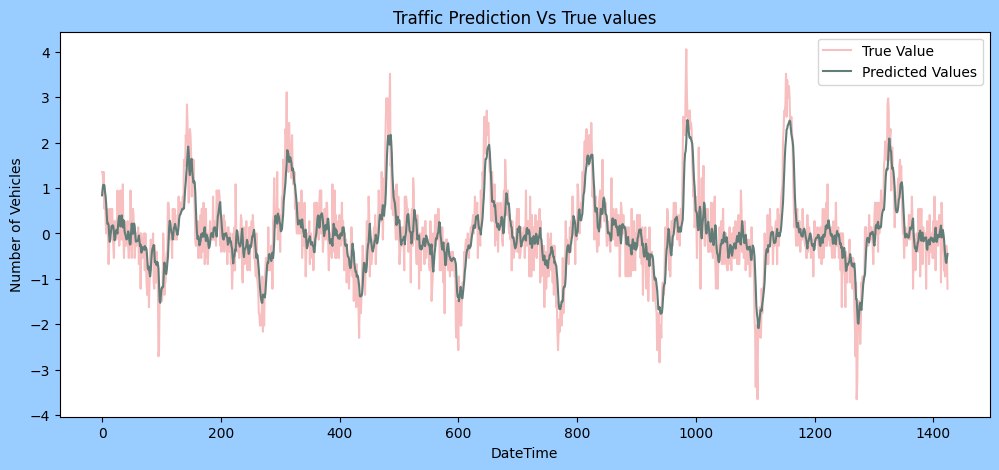


########------LSTM Model------########
The root mean squared error is 0.5792634231672263.


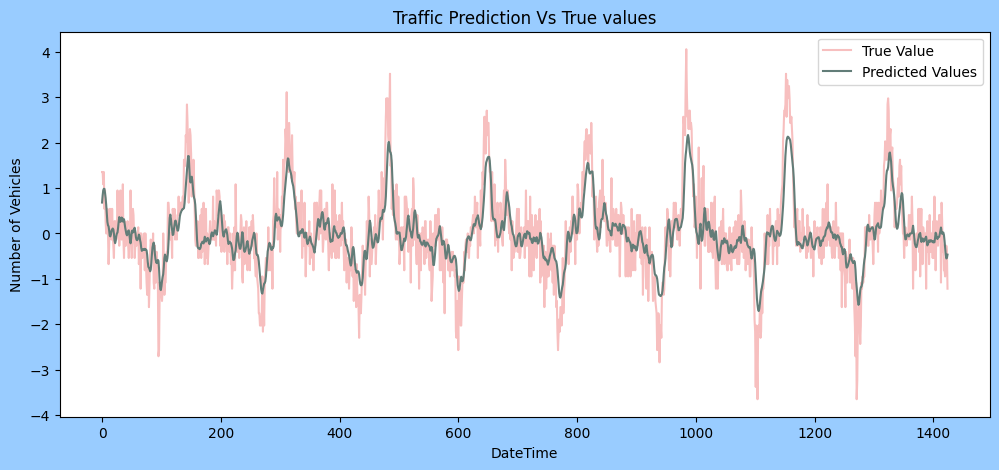


########------CNN Model------########
The root mean squared error is 0.5427212212783866.


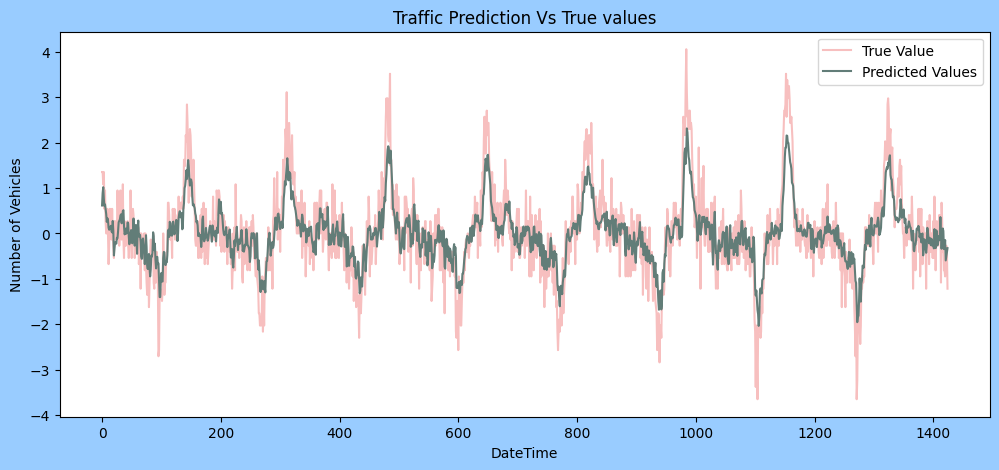


########------MLP Model------########
The root mean squared error is 0.5612801490671254.


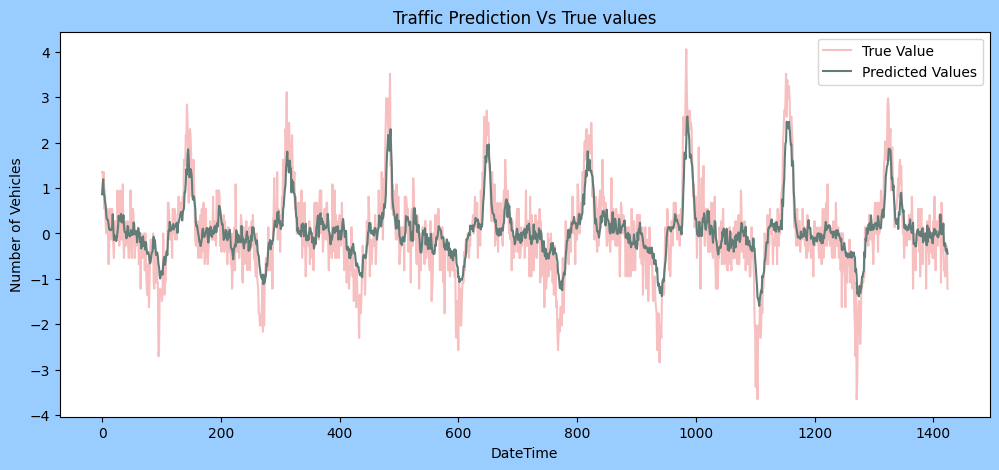


Best Model: Custom - RMSE: 0.4776456888635244



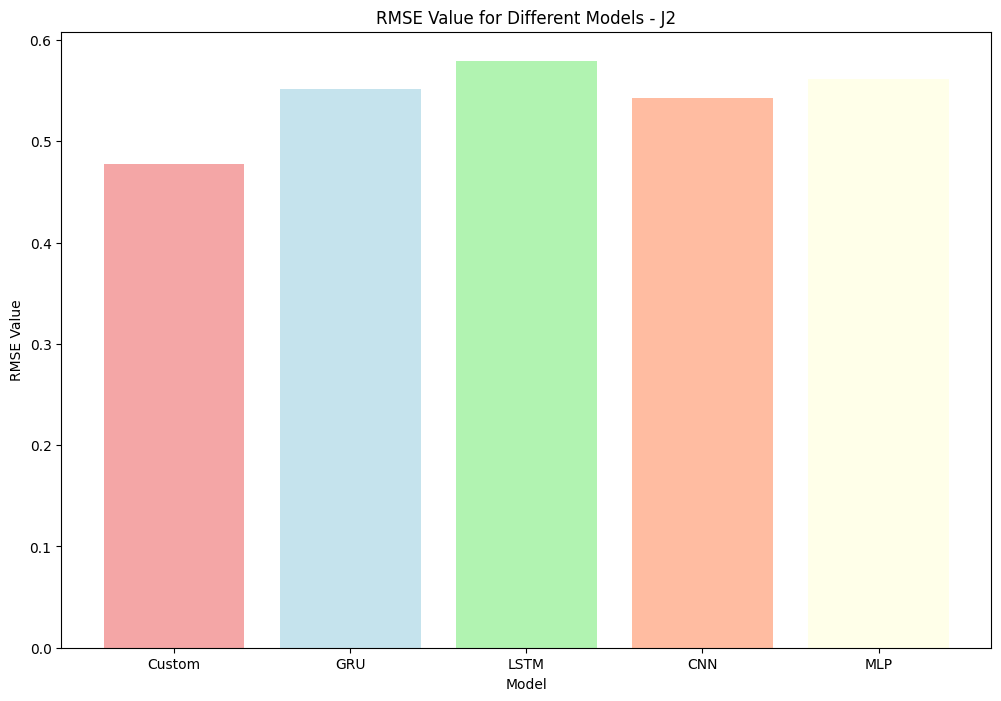

In [ ]:
# Results for J2 - Custom Model
print("\033[1;31;2m########------Custom Model------########\033[0m")
RMSE_J2_Custom = RMSE_Value(y_testJ2, PredJ2_Custom)
PredictionsPlot(y_testJ2, PredJ2_Custom, 0)

# Results for J2 - GRU Model
print("\033[1;31;2m########------GRU Model------########\033[0m")
RMSE_J2_GRU = RMSE_Value(y_testJ2, PredJ2_GRU)
PredictionsPlot(y_testJ2, PredJ2_GRU, 0)

# Results for J2 - LSTM Model
print("\n\033[1;34;2m########------LSTM Model------########\033[0m")
RMSE_J2_LSTM = RMSE_Value(y_testJ2, PredJ2_LSTM)
PredictionsPlot(y_testJ2, PredJ2_LSTM, 0)

# Results for J2 - CNN Model
print("\n\033[1;32;2m########------CNN Model------########\033[0m")
RMSE_J2_CNN = RMSE_Value(y_testJ2, PredJ2_CNN)
PredictionsPlot(y_testJ2, PredJ2_CNN, 0)

# Results for J2 - MLP Model
print("\n\033[1;33;2m########------MLP Model------########\033[0m")
RMSE_J2_MLP = RMSE_Value(y_testJ2, PredJ2_MLP)
PredictionsPlot(y_testJ2, PredJ2_MLP, 0)

# Create a list of model names and their corresponding RMSE values
model_names = ["Custom", "GRU", "LSTM", "CNN", "MLP"]
rmse_values = [RMSE_J2_Custom, RMSE_J2_GRU, RMSE_J2_LSTM, RMSE_J2_CNN, RMSE_J2_MLP]

model_rmse = list(zip(model_names, rmse_values))
Results_df = pd.DataFrame(model_rmse, columns=["MODEL", "RMSE"])
styled_df = Results_df.style.background_gradient(cmap="cool")

# Find the best model with the minimum RMSE value
best_model_index = rmse_values.index(min(rmse_values))
best_model_name_2 = model_names[best_model_index]
best_model_rmse_2 = rmse_values[best_model_index]

# Print the best model name and its RMSE value
print("\n\033[1;31;4mBest Model: {} - RMSE: {}\n".format(best_model_name_2, best_model_rmse_2))

# Plot the bar graph for model names and RMSE values with transparency and lighter colors
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightyellow']
alpha = 0.7
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size (width, height)
ax.bar(model_names, rmse_values, color=colors, alpha=alpha)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE Value for Different Models - J2')
plt.show()

display(styled_df)

In [ ]:
# Predictions For Third Junction
# Predictions For Third Junction
print("\033[1;31;2m########------Custom Model------########\033[0m")
PredJ3_Custom = Custom_model(X_trainJ3, y_trainJ3, X_testJ3, y_testJ3)
print("-" * 70)
print("\033[1;31;2m########------GRU Model------########\033[0m")
PredJ3_GRU = GRU_model(X_trainJ3, y_trainJ3, X_testJ3, y_testJ3)
print("-" * 70)
print("\033[1;34;2m########------LSTM Model------########\033[0m")
PredJ3_LSTM = LSTM_model(X_trainJ3, y_trainJ3, X_testJ3, y_testJ3)
print("-" * 70)
print("\033[1;32;2m########------CNN Model------########\033[0m")
PredJ3_CNN = CNN_model(X_trainJ3, y_trainJ3, X_testJ3, y_testJ3)
print("-" * 70)
print("\033[1;33;2m########------MLP Model------########\033[0m")
PredJ3_MLP = MLP_model(X_trainJ3, y_trainJ3, X_testJ3, y_testJ3)
print("-" * 70)

########------Custom Model------########
Epoch 1/50
110/110 [==============================] - 2s 7ms/step - loss: 0.3025 - val_loss: 0.3727
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.2820 - val_loss: 0.3547
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.2679 - val_loss: 0.3540
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.2606 - val_loss: 0.3671
Epoch 5/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2588 - val_loss: 0.3449
Epoch 6/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2539 - val_loss: 0.3551
Epoch 7/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2489 - val_loss: 0.3492
Epoch 8/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2455 - val_loss: 0.3479
Epoch 9/50
110/110 [==============================] - 0s 4ms/step - loss: 0.2436 - val_loss: 0.3434
Epoch 10/50
110/110 [==============================] - 0s 4

########------Custom Model------########
The root mean squared error is 0.5655572705684435.


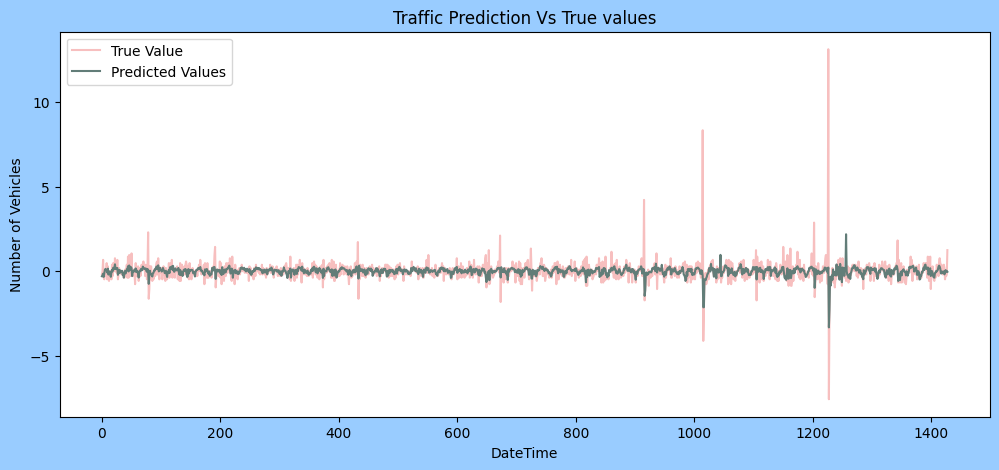

########------GRU Model------########
The root mean squared error is 0.6059478939149984.


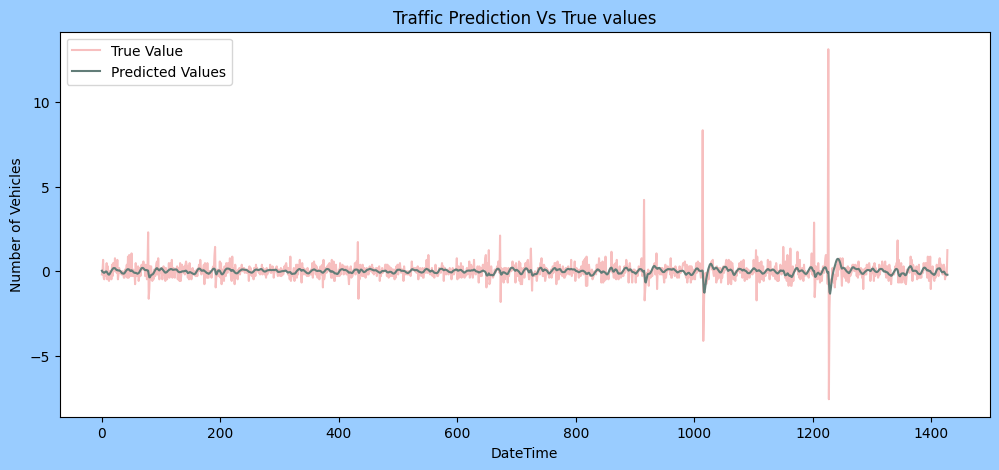


########------LSTM Model------########
The root mean squared error is 0.6210786449389175.


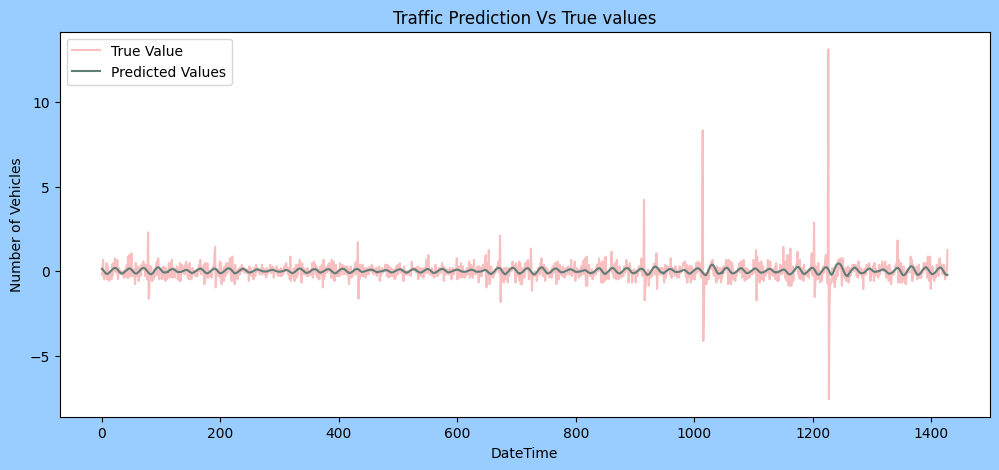


########------CNN Model------########
The root mean squared error is 0.5781111817022215.


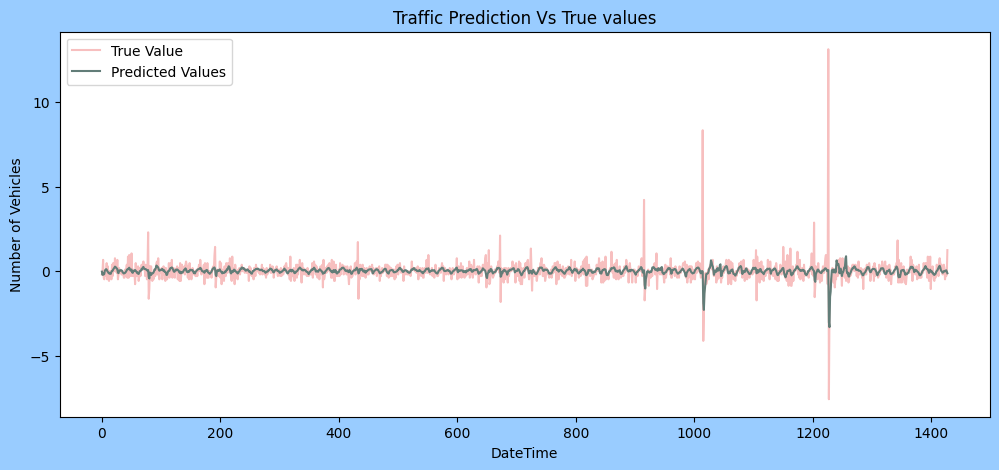


########------MLP Model------########
The root mean squared error is 0.624077810361193.


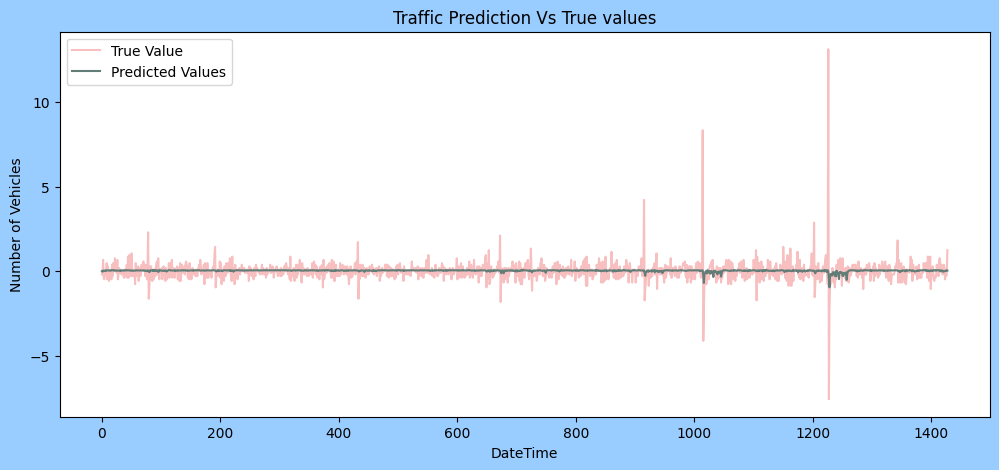


Best Model: Custom - RMSE: 0.5655572705684435



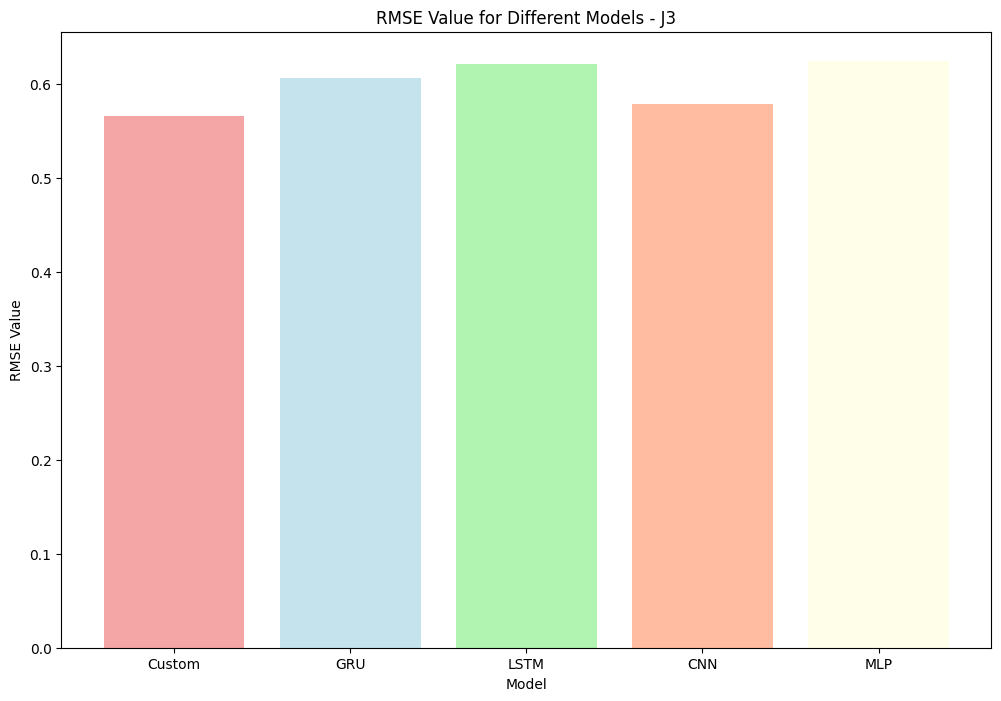

In [ ]:
# Results for J3 - Custom Model
print("\033[1;31;2m########------Custom Model------########\033[0m")
RMSE_J3_Custom = RMSE_Value(y_testJ3, PredJ3_Custom)
PredictionsPlot(y_testJ3, PredJ3_Custom, 0)

# Results for J3 - GRU Model
print("\033[1;31;2m########------GRU Model------########\033[0m")
RMSE_J3_GRU = RMSE_Value(y_testJ3, PredJ3_GRU)
PredictionsPlot(y_testJ3, PredJ3_GRU, 0)

# Results for J3 - LSTM Model
print("\n\033[1;34;2m########------LSTM Model------########\033[0m")
RMSE_J3_LSTM = RMSE_Value(y_testJ3, PredJ3_LSTM)
PredictionsPlot(y_testJ3, PredJ3_LSTM, 0)

# Results for J3 - CNN Model
print("\n\033[1;32;2m########------CNN Model------########\033[0m")
RMSE_J3_CNN = RMSE_Value(y_testJ3, PredJ3_CNN)
PredictionsPlot(y_testJ3, PredJ3_CNN, 0)

# Results for J3 - MLP Model
print("\n\033[1;33;2m########------MLP Model------########\033[0m")
RMSE_J3_MLP = RMSE_Value(y_testJ3, PredJ3_MLP)
PredictionsPlot(y_testJ3, PredJ3_MLP, 0)

# Create a list of model names and their corresponding RMSE values
model_names = ["Custom", "GRU", "LSTM", "CNN", "MLP"]
rmse_values = [RMSE_J3_Custom, RMSE_J3_GRU, RMSE_J3_LSTM, RMSE_J3_CNN, RMSE_J3_MLP]

model_rmse = list(zip(model_names, rmse_values))
Results_df = pd.DataFrame(model_rmse, columns=["MODEL", "RMSE"])
styled_df = Results_df.style.background_gradient(cmap="cool")

# Find the best model with the minimum RMSE value
best_model_index = rmse_values.index(min(rmse_values))
best_model_name_3 = model_names[best_model_index]
best_model_rmse_3 = rmse_values[best_model_index]

# Print the best model name and its RMSE value
print("\n\033[1;31;4mBest Model: {} - RMSE: {}\n".format(best_model_name_3, best_model_rmse_3))

# Plot the bar graph for model names and RMSE values with transparency and lighter colors
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightyellow']
alpha = 0.7
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size (width, height)
ax.bar(model_names, rmse_values, color=colors, alpha=alpha)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE Value for Different Models - J3')
plt.show()

display(styled_df)

In [ ]:
# Predictions For Fourth Junction
print("\033[1;31;2m########------Custom Model------########\033[0m")
PredJ4_Custom = Custom_model(X_trainJ4, y_trainJ4, X_testJ4, y_testJ4)
print("-" * 70)
print("\033[1;31;2m########------GRU Model------########\033[0m")
PredJ4_GRU = GRU_model(X_trainJ4, y_trainJ4, X_testJ4, y_testJ4)
print("-" * 70)
print("\033[1;34;2m########------LSTM Model------########\033[0m")
PredJ4_LSTM = LSTM_model(X_trainJ4, y_trainJ4, X_testJ4, y_testJ4)
print("-" * 70)
print("\033[1;32;2m########------CNN Model------########\033[0m")
PredJ4_CNN = CNN_model(X_trainJ4, y_trainJ4, X_testJ4, y_testJ4)
print("-" * 70)
print("\033[1;33;2m########------MLP Model------########\033[0m")
PredJ4_MLP = MLP_model(X_trainJ4, y_trainJ4, X_testJ4, y_testJ4)
print("-" * 70)

########------Custom Model------########
Epoch 1/50
33/33 [==============================] - 2s 13ms/step - loss: 0.6910 - val_loss: 1.1557
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: 0.6371 - val_loss: 1.0856
Epoch 3/50
33/33 [==============================] - 0s 6ms/step - loss: 0.5892 - val_loss: 1.0254
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.5696 - val_loss: 1.0185
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5581 - val_loss: 1.0191
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: 0.5304 - val_loss: 1.0213
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5245 - val_loss: 0.9921
Epoch 8/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5119 - val_loss: 0.9963
Epoch 9/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5111 - val_loss: 1.0118
Epoch 10/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5

########------Custom Model------########
The root mean squared error is 0.9914153105204727.


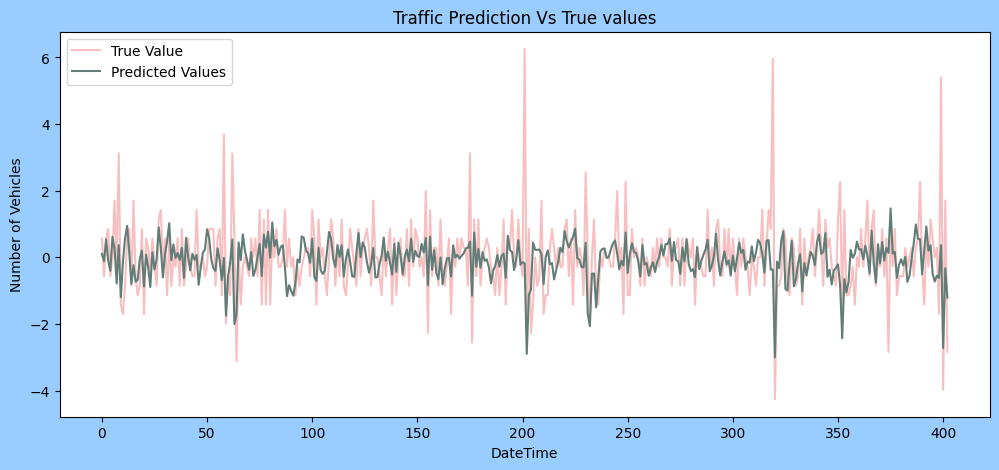

########------GRU Model------########
The root mean squared error is 0.9919645093279377.


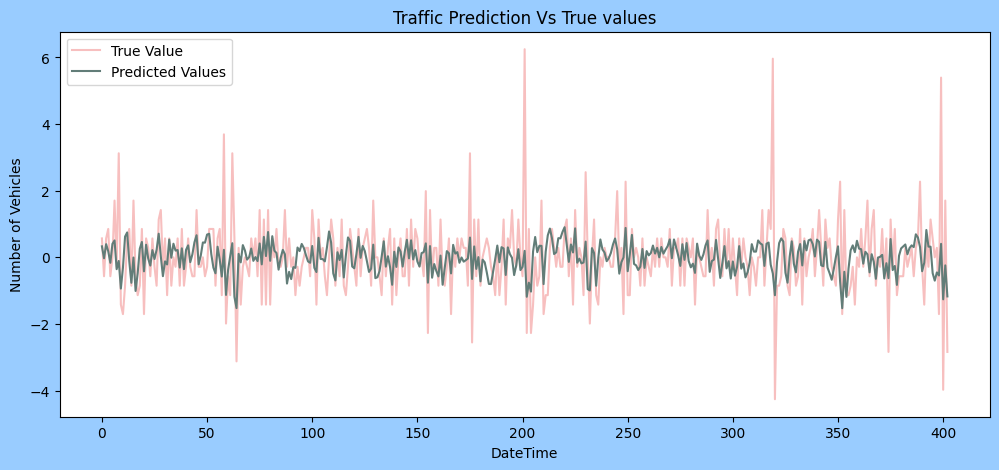


########------LSTM Model------########
The root mean squared error is 1.0985445909394698.


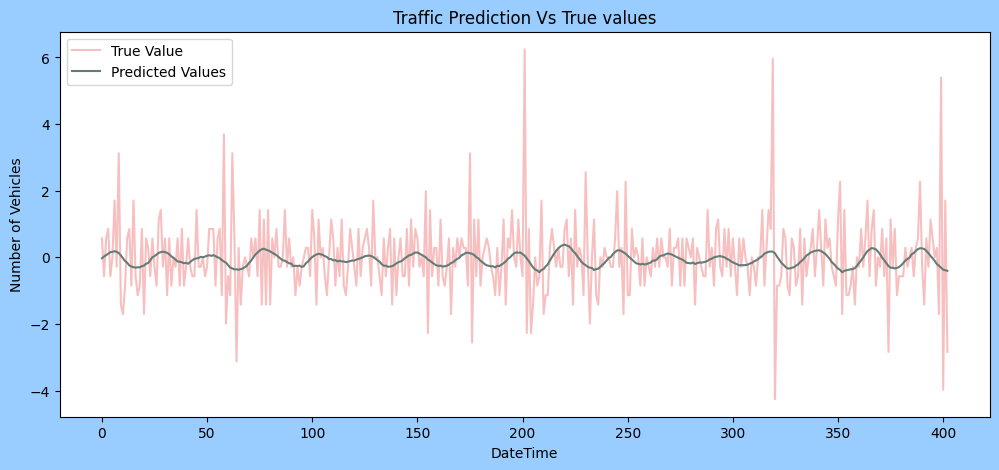


########------CNN Model------########
The root mean squared error is 1.0018679252449971.


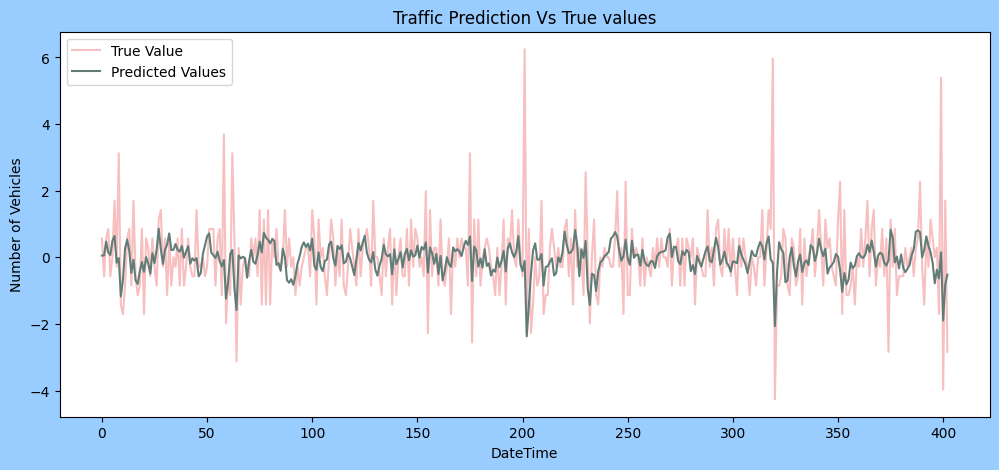


########------MLP Model------########
The root mean squared error is 1.0915597823080931.


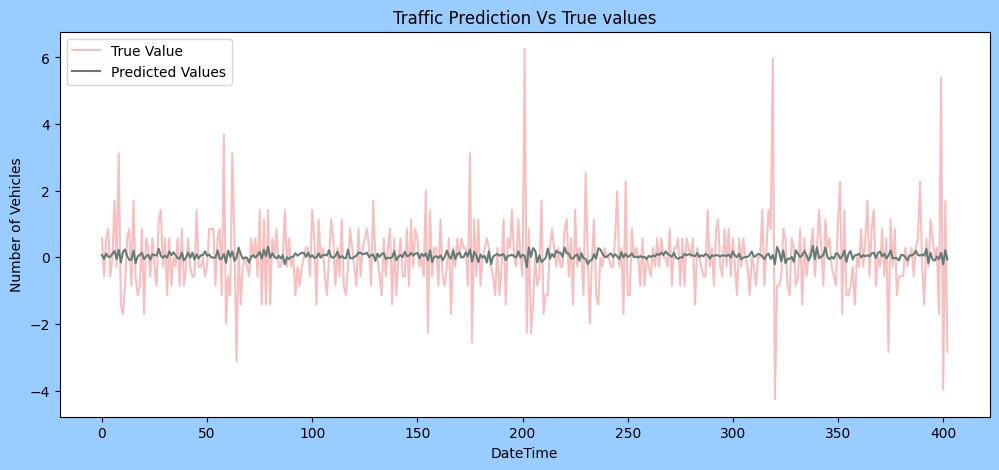


Best Model: Custom - RMSE: 0.9914153105204727



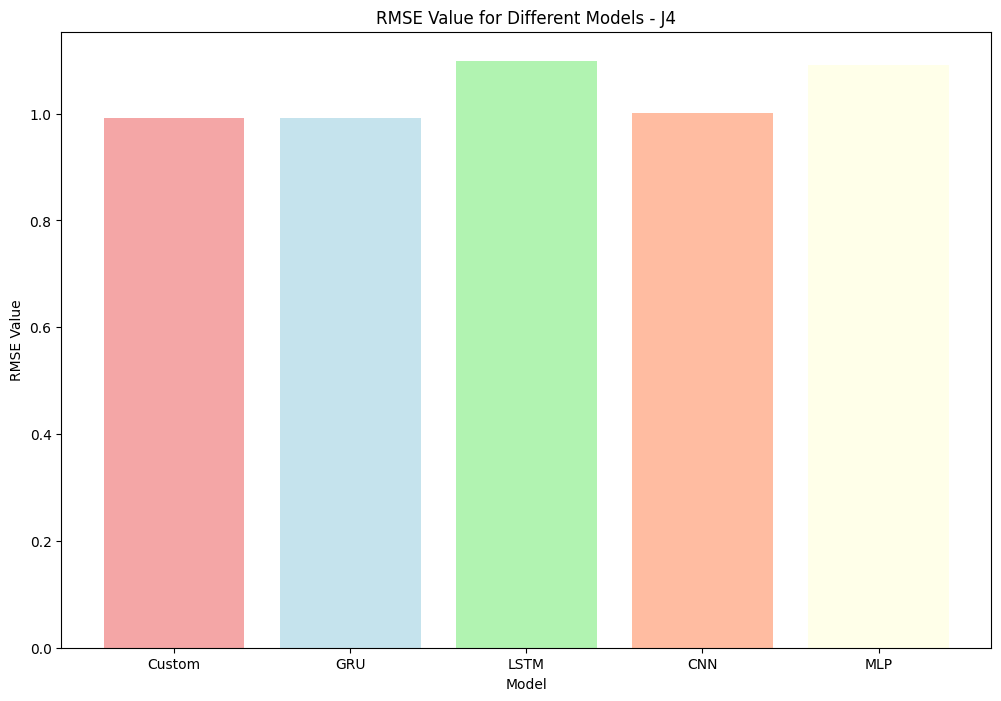

In [ ]:
# Results for J4 - Custom Model
print("\033[1;31;2m########------Custom Model------########\033[0m")
RMSE_J4_Custom = RMSE_Value(y_testJ4, PredJ4_Custom)
PredictionsPlot(y_testJ4, PredJ4_Custom, 0)

# Results for J4 - GRU Model
print("\033[1;31;2m########------GRU Model------########\033[0m")
RMSE_J4_GRU = RMSE_Value(y_testJ4, PredJ4_GRU)
PredictionsPlot(y_testJ4, PredJ4_GRU, 0)

# Results for J4 - LSTM Model
print("\n\033[1;34;2m########------LSTM Model------########\033[0m")
RMSE_J4_LSTM = RMSE_Value(y_testJ4, PredJ4_LSTM)
PredictionsPlot(y_testJ4, PredJ4_LSTM, 0)

# Results for J4 - CNN Model
print("\n\033[1;32;2m########------CNN Model------########\033[0m")
RMSE_J4_CNN = RMSE_Value(y_testJ4, PredJ4_CNN)
PredictionsPlot(y_testJ4, PredJ4_CNN, 0)

# Results for J4 - MLP Model
print("\n\033[1;33;2m########------MLP Model------########\033[0m")
RMSE_J4_MLP = RMSE_Value(y_testJ4, PredJ4_MLP)
PredictionsPlot(y_testJ4, PredJ4_MLP, 0)

# Create a list of model names and their corresponding RMSE values
model_names = ["Custom", "GRU", "LSTM", "CNN", "MLP"]
rmse_values = [RMSE_J4_Custom, RMSE_J4_GRU, RMSE_J4_LSTM, RMSE_J4_CNN, RMSE_J4_MLP]

model_rmse = list(zip(model_names, rmse_values))
Results_df = pd.DataFrame(model_rmse, columns=["MODEL", "RMSE"])
styled_df = Results_df.style.background_gradient(cmap="cool")

# Find the best model with the minimum RMSE value
best_model_index = rmse_values.index(min(rmse_values))
best_model_name_4 = model_names[best_model_index]
best_model_rmse_4 = rmse_values[best_model_index]

# Print the best model name and its RMSE value
print("\n\033[1;31;4mBest Model: {} - RMSE: {}\n".format(best_model_name_4, best_model_rmse_4))

# Plot the bar graph for model names and RMSE values with transparency and lighter colors
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightyellow']
alpha = 0.7
fig, ax = plt.subplots(figsize=(12, 8))  # Set the figure size (width, height)
ax.bar(model_names, rmse_values, color=colors, alpha=alpha)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE Value for Different Models - J4')
plt.show()

display(styled_df)

**The results of the model**

In [ ]:
#Initialise data of lists for error values of four junctions.
Junctions = ["Junction1", "Junction2", "Junction3", "Junction4"]
RMSE = [best_model_rmse_1, best_model_rmse_2, best_model_rmse_3, best_model_rmse_4]
Model = [best_model_name_1, best_model_name_2, best_model_name_3, best_model_name_4]
list_of_tuples = list(zip(Junctions, RMSE, Model))
# Creates pandas DataFrame.
Results = pd.DataFrame(list_of_tuples, columns=["Junction", "RMSE", "MODEL"])
Results.style.background_gradient(cmap="Pastel1")

**The Root Mean Square Error serves as a somewhat subjective metric for evaluating performance. Therefore, in this project, I am also incorporating outcome plots for a more comprehensive assessment.**

<a id="7"></a>
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:120%;text-align:center;border-radius:20px 60px;">Inversing The Transformation Of Data</p>

In this section, I will reverse the transformations applied to the datasets to eliminate seasonality and trends. This step is essential for ensuring that the predictions return to their accurate scale.

Resource to the inversion process [Link](https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/)

In [ ]:
# Functions to inverse transforms and Plot comparitive plots
# invert differenced forecast
def inverse_difference(last_ob, value):
    inversed = value + last_ob
    return inversed
#Plotting the comparison
def Sub_Plots2(df_1, df_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#99ccff")
    fig.suptitle(title)

    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")

    pl_2=sns.lineplot(ax=axes[1],data=df_2["Vehicles"],color="#627D78")
    axes[1].set(ylabel ="Orignal")

**The Inverse Transform on the first junction**

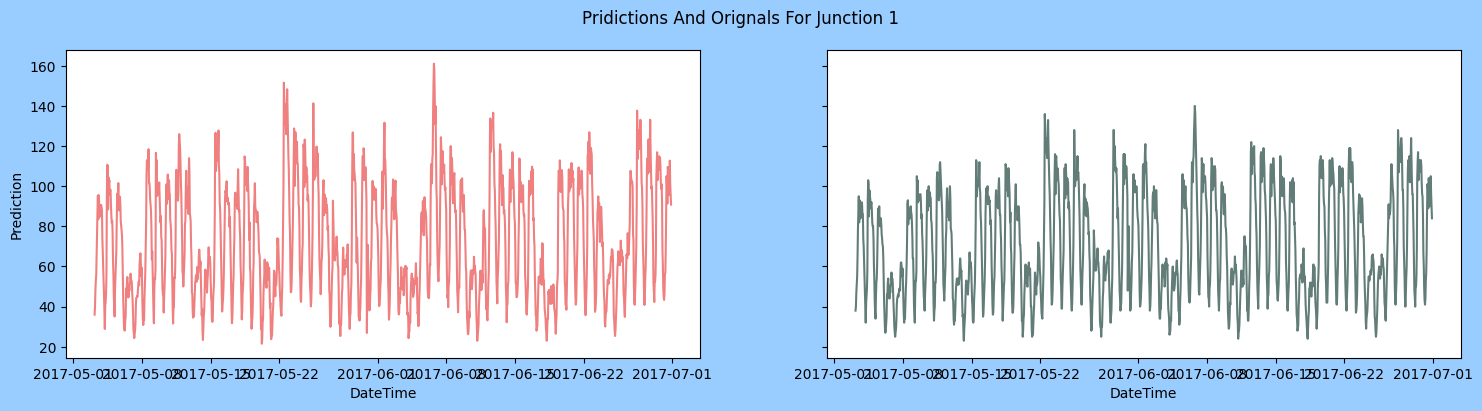

In [ ]:
# invert the differenced forecast for Junction 1
recover1 = df_N1.Norm[-1412:-1].to_frame()
recover1["Pred"]= globals()[f"PredJ1_{Model[0]}"]
Transform_reverssed_J1 = inverse_difference(recover1.Norm, recover1.Pred).to_frame()
Transform_reverssed_J1.columns = ["Pred_Normed"]
#Invert the normalizeation J1
Final_J1_Pred = (Transform_reverssed_J1.values* std_J1) + av_J1
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred
#Plotting the Predictions with orignals
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], df_1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)

**the inverse transform on the second junction**

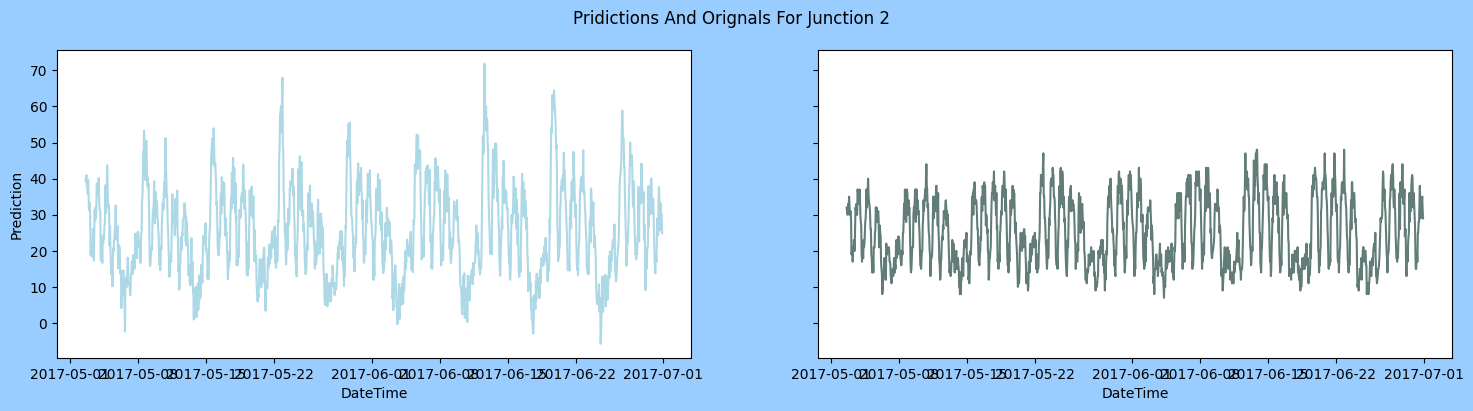

In [ ]:
#Invert the differenced J2
recover2 = df_N2.Norm[-1426:-1].to_frame() #len as per the diff
recover2["Pred"]= globals()[f"PredJ2_{Model[1]}"]
Transform_reverssed_J2 = inverse_difference(recover2.Norm, recover2.Pred).to_frame()
Transform_reverssed_J2.columns = ["Pred_Normed"]
Final_J2_Pred = (Transform_reverssed_J2.values* std_J2) + av_J2
Transform_reverssed_J2["Pred_Final"] =Final_J2_Pred
#Plotting the Predictions with orignals
Sub_Plots2(Transform_reverssed_J2["Pred_Final"], df_2[-1426:-1],"Pridictions And Orignals For Junction 2", 1)

**The inverse transform on the third junction**

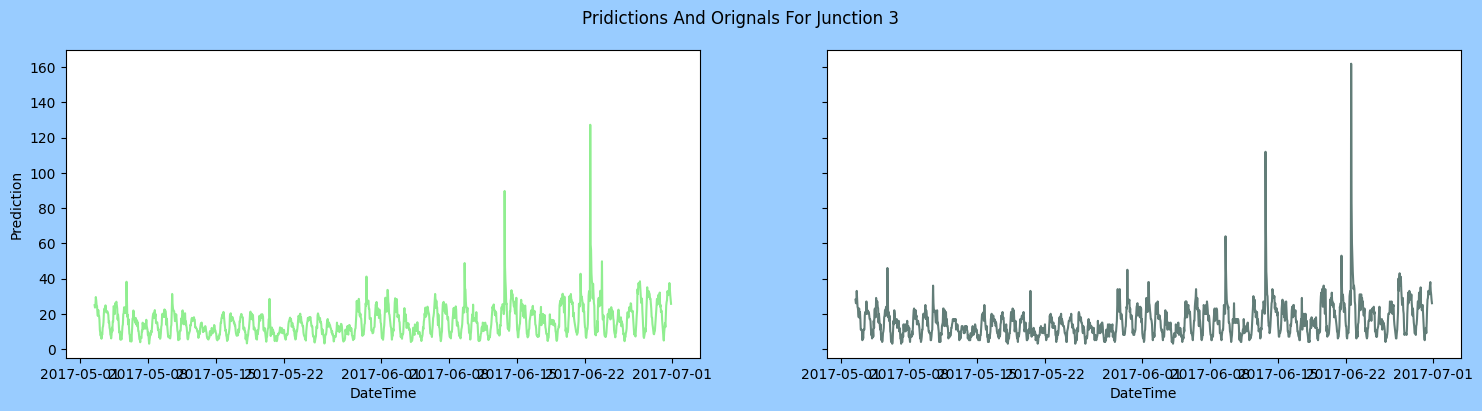

In [ ]:
#Invert the differenced J3
recover3 = df_N3.Norm[-1429:-1].to_frame() #len as per the diff
recover3["Pred"]= globals()[f"PredJ3_{Model[2]}"]
Transform_reverssed_J3 = inverse_difference(recover3.Norm, recover3.Pred).to_frame()
Transform_reverssed_J3.columns = ["Pred_Normed"]
#Invert the normalizeation J3
Final_J3_Pred = (Transform_reverssed_J3.values* std_J3) + av_J3
Transform_reverssed_J3["Pred_Final"] =Final_J3_Pred
Sub_Plots2(Transform_reverssed_J3["Pred_Final"], df_3[-1429:-1],"Pridictions And Orignals For Junction 3", 2)

**The inverse transform on the fourth junction**

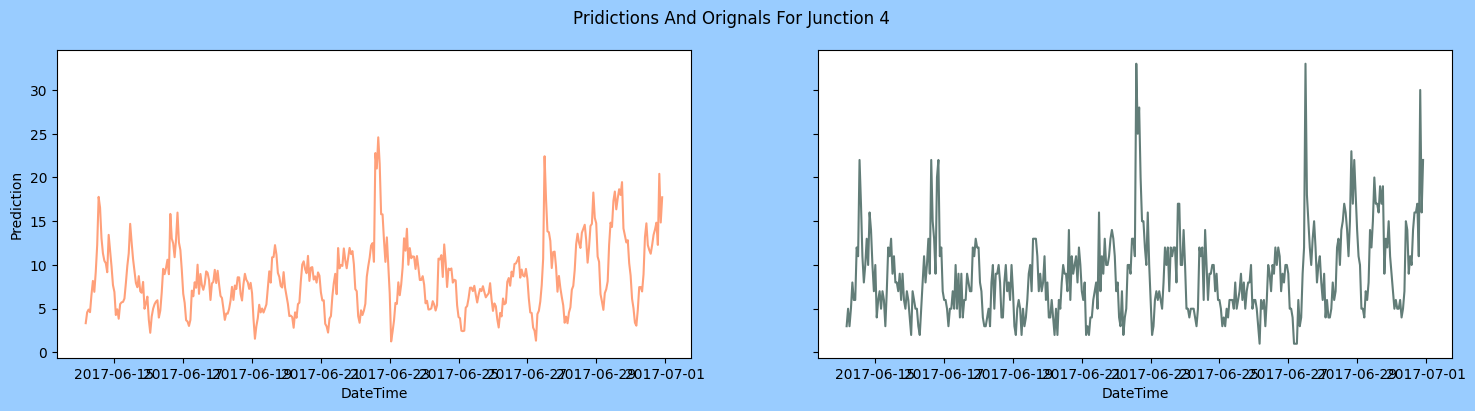

In [ ]:
#Invert the differenced J4
recover4 = df_N4.Norm[-404:-1].to_frame()  #len as per the testset
recover4["Pred"]= globals()[f"PredJ4_{Model[3]}"]
Transform_reverssed_J4 = inverse_difference(recover4.Norm, recover4.Pred).to_frame()
Transform_reverssed_J4.columns = ["Pred_Normed"]
#Invert the normalizeation J4
Final_J4_Pred = (Transform_reverssed_J4.values* std_J4) + av_J4
Transform_reverssed_J4["Pred_Final"] =Final_J4_Pred
Sub_Plots2(Transform_reverssed_J4["Pred_Final"], df_4[-404:-1],"Pridictions And Orignals For Junction 4", 3)

**Summary**

*In this project, I trained several models including GRU, CNN, MLP, LSTM, and a custom model to predict traffic on four junctions. I employed normalization and differencing transforms to achieve stationary time series. Considering the varying trends and seasonality among the junctions, I adopted different approaches to make each stationary. The root mean squared error served as the evaluation metric for the models. Additionally, I plotted the predictions alongside the original test values.
Key insights from the data analysis are as follows:*

*Junction one exhibits a more rapid increase in the number of vehicles compared to junctions two and three. However, the sparse data in junction four prevents conclusive analysis.*

*Junction one's traffic displays a stronger weekly and hourly seasonality, whereas other junctions appear more linear.*




















<a id="8"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">End</p>